In [1]:
import pandas as pd
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mujtabamatin/air-quality-and-pollution-assessment")
print(f"Path to dataset files: {path}")

/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/parth/.cache/kagglehub/datasets/mujtabamatin/air-quality-and-pollution-assessment/versions/2


In [3]:
from pathlib import Path

dataset_path = Path(f"{path}").joinpath("updated_pollution_dataset.csv")
dataset = pd.read_csv(dataset_path)
dataset.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


In [4]:
dataset.rename(columns={"Air Quality": "y"}, inplace=True)

In [5]:
dataset.isna().sum()

Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
y                                0
dtype: int64

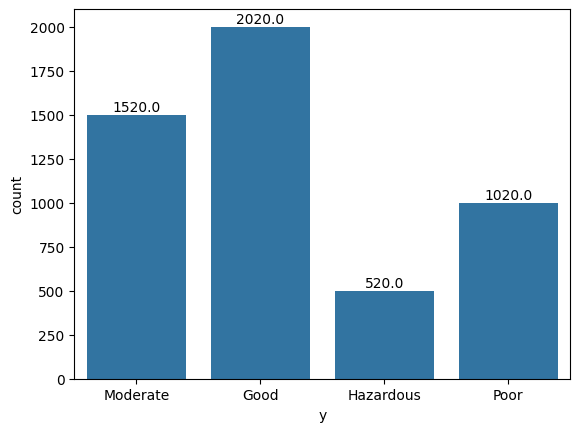

In [6]:
import seaborn as sns

ax = sns.countplot(x="y", data=dataset)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 20, height + 20, ha="center")

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset["y"] = encoder.fit_transform(dataset["y"])

In [8]:
import cloudpickle as cp

run = 1
root_path = Path(f"./saved-runs/run-{run}")
root_path.mkdir(parents=True, exist_ok=True)

encoder_file = root_path.joinpath("encoders", "label_encoder.pkl")
encoder_file.parent.mkdir(parents=True, exist_ok=True)
with open(encoder_file, "wb") as f:
    cp.dump(encoder, f)

In [9]:
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,y
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,1.300000
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,1.187553
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,0.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,0.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,1.500000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,2.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000,3.000000


In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[[
    'Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas',
    'Population_Density'
 ]] = scaler.fit_transform(dataset[[
    'Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas',
    'Population_Density'
 ]])

In [11]:
encoder_file = root_path.joinpath("scalers", "standard_scaler.pkl")
encoder_file.parent.mkdir(parents=True, exist_ok=True)
with open(encoder_file, "wb") as f:
    cp.dump(encoder, f)

In [12]:
dataset.describe()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,y
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000
mean,-4.007461e-16,4.554579e-16,9.379164e-17,-1.474376e-16,1.335820e-16,-7.247536e-17,-3.346656e-16,5.258016e-17,-1.875833e-16,1.300000
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.187553
min,-2.474560e+00,-2.147027e+00,-8.203839e-01,-1.112332e+00,-2.137520e+00,-2.402328e+00,-1.557505e+00,-1.641120e+00,-2.025836e+00,0.000000
25%,-7.334863e-01,-7.411504e-01,-6.330272e-01,-6.552350e-01,-7.096659e-01,-7.281616e-01,-8.614983e-01,-8.379257e-01,-7.622411e-01,0.000000
50%,-1.531282e-01,-1.614678e-02,-3.316272e-01,-3.114977e-01,-1.250328e-01,-2.985083e-01,-1.654920e-01,-1.455167e-01,-2.241605e-02,1.500000
75%,5.909206e-01,6.458130e-01,2.426620e-01,2.882142e-01,6.170016e-01,5.496866e-01,6.220941e-01,7.407669e-01,6.715792e-01,2.000000
max,4.251641e+00,3.659306e+00,1.119489e+01,1.044309e+01,4.327173e+00,5.168459e+00,4.065494e+00,4.812132e+00,3.008903e+00,3.000000


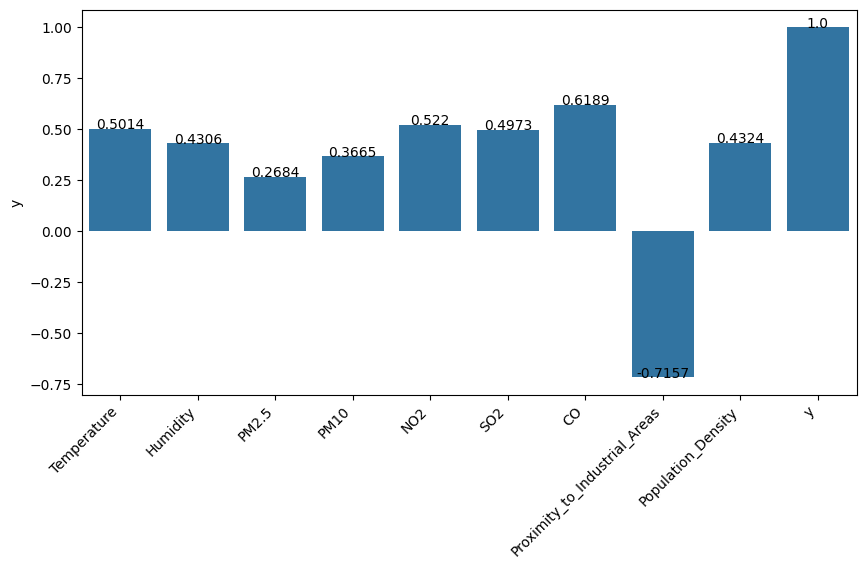

In [13]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 5), dpi=100)

corr_map = dataset.corr()["y"]
ax = sns.barplot(corr_map)
for p in ax.patches:
    height = round(p.get_height(), 4)
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha="center")

_ = plt.xticks(rotation=45, ha="right")

In [14]:
dataset.columns.tolist()

['Temperature',
 'Humidity',
 'PM2.5',
 'PM10',
 'NO2',
 'SO2',
 'CO',
 'Proximity_to_Industrial_Areas',
 'Population_Density',
 'y']

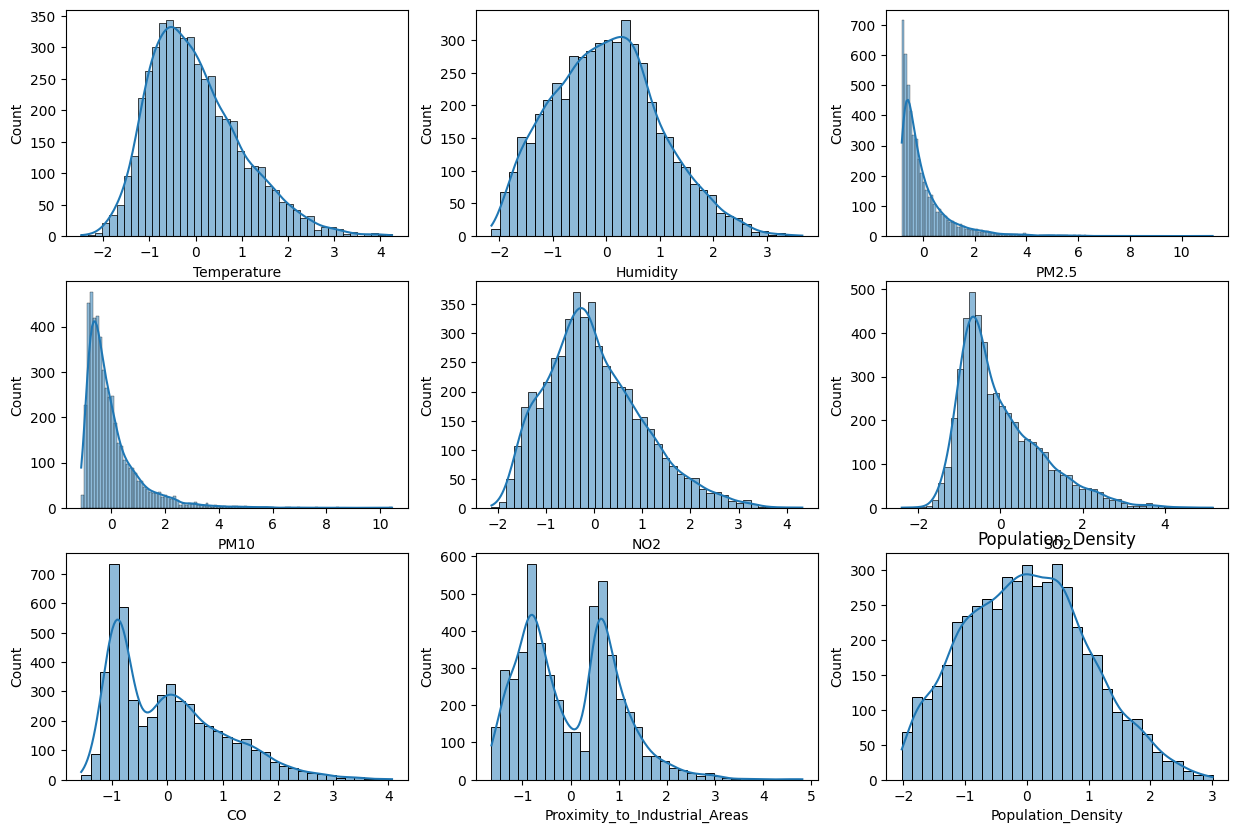

In [15]:
fig, axes = plt.subplots(dataset.shape[1]//3, 3, figsize=(15, 10), dpi=100)

col = 0
row = 0
for column in dataset.columns:
    if column == "y":
        continue
    sns.histplot(x=dataset[column], kde=True, ax=axes[col, row])
    plt.title(column)

    col, row = (col + 1, 0) if row >= 2 else (col, row + 1)

In [16]:
from sklearn.preprocessing import PowerTransformer

columns_to_transform = [
    # "PM2.5", "PM10", "CO", "Proximity_to_Industrial_Areas"
    "PM2.5", "PM10"
]
transformer = PowerTransformer(method="yeo-johnson", standardize=False)
dataset[columns_to_transform] = transformer.fit_transform(dataset[columns_to_transform])

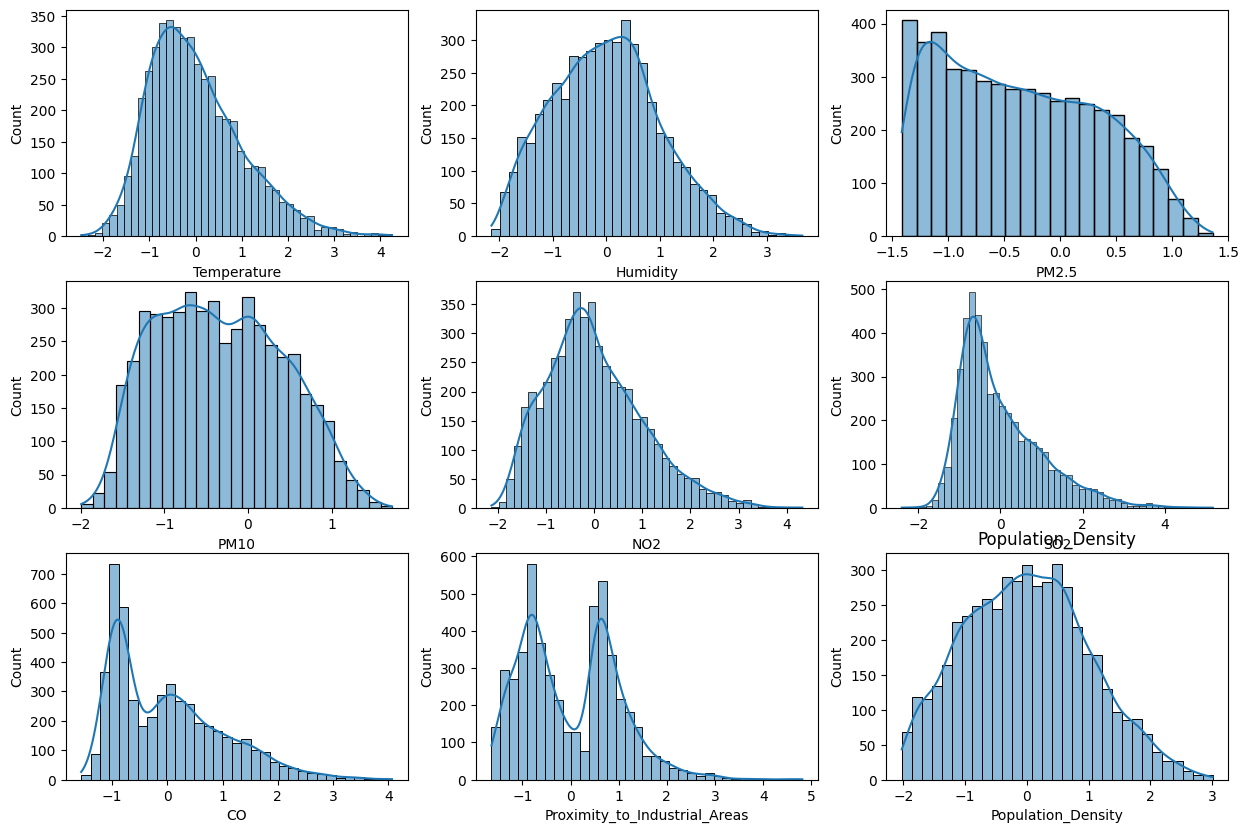

In [17]:
fig, axes = plt.subplots(dataset.shape[1]//3, 3, figsize=(15, 10), dpi=100)

col = 0
row = 0
for column in dataset.columns:
    if column == "y":
        continue
    sns.histplot(x=dataset[column], kde=True, ax=axes[col, row])
    plt.title(column)

    col, row = (col + 1, 0) if row >= 2 else (col, row + 1)

In [18]:
transformer_file = root_path.joinpath("transformer", "yeo_johnson_transformer.pkl")
transformer_file.parent.mkdir(parents=True, exist_ok=True)

with open(transformer_file, "wb") as f:
    cp.dump(transformer, f)

In [19]:
dataset.columns

Index(['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO',
       'Proximity_to_Industrial_Areas', 'Population_Density', 'y'],
      dtype='object')

In [20]:
from sklearn.model_selection import train_test_split

X = dataset.drop(columns=["y"])
y = dataset[["y"]]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y, shuffle=True
)

print(f"Train dataset size: {X_train.shape[0]}")
print(f"Test dataset size: {X_test.shape[0]}")

Train dataset size: 4000
Test dataset size: 1000


In [21]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(
    hidden_layer_sizes=30,
    activation="relu",
    solver="adam",
    alpha=0.003,
    batch_size=64,
    learning_rate="constant",
    learning_rate_init=0.001,
    max_iter=200,
    shuffle=True,
    random_state=42,
    tol=0.001,
    verbose=True,
    beta_1=0.9,
    beta_2=0.999,
    early_stopping=True,
    validation_fraction=0.2,
    n_iter_no_change=20,
)
model.fit(X, y)

Iteration 1, loss = 1.06998261
Validation score: 0.556000
Iteration 2, loss = 0.76272299
Validation score: 0.729000
Iteration 3, loss = 0.60397012
Validation score: 0.800000
Iteration 4, loss = 0.49279694
Validation score: 0.859000
Iteration 5, loss = 0.41471471
Validation score: 0.877000
Iteration 6, loss = 0.35923625
Validation score: 0.894000
Iteration 7, loss = 0.32021453
Validation score: 0.908000


/home/parth/miniconda3/envs/env-practice-ml-py310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1119: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 8, loss = 0.29156275
Validation score: 0.914000
Iteration 9, loss = 0.26882289
Validation score: 0.913000
Iteration 10, loss = 0.25151544
Validation score: 0.923000
Iteration 11, loss = 0.23672247
Validation score: 0.928000
Iteration 12, loss = 0.22470341
Validation score: 0.922000
Iteration 13, loss = 0.21546642
Validation score: 0.927000
Iteration 14, loss = 0.20763454
Validation score: 0.929000
Iteration 15, loss = 0.19996466
Validation score: 0.932000
Iteration 16, loss = 0.19363550
Validation score: 0.934000
Iteration 17, loss = 0.18832459
Validation score: 0.932000
Iteration 18, loss = 0.18391207
Validation score: 0.935000
Iteration 19, loss = 0.18007918
Validation score: 0.933000
Iteration 20, loss = 0.17660926
Validation score: 0.936000
Iteration 21, loss = 0.17376812
Validation score: 0.932000
Iteration 22, loss = 0.17143894
Validation score: 0.936000
Iteration 23, loss = 0.16850859
Validation score: 0.936000
Iteration 24, loss = 0.16659607
Validation score: 0.933000

MLPClassifier(alpha=0.003, batch_size=64, early_stopping=True,
              hidden_layer_sizes=30, n_iter_no_change=20, random_state=42,
              tol=0.001, validation_fraction=0.2, verbose=True)

Text(0.5, 1.0, 'Loss')

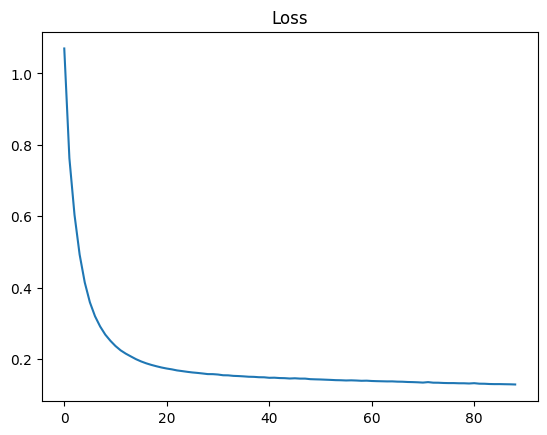

In [22]:
sns.lineplot(model.loss_curve_, legend=True)
plt.title("Loss")

Text(0.5, 1.0, 'Validation accuracy')

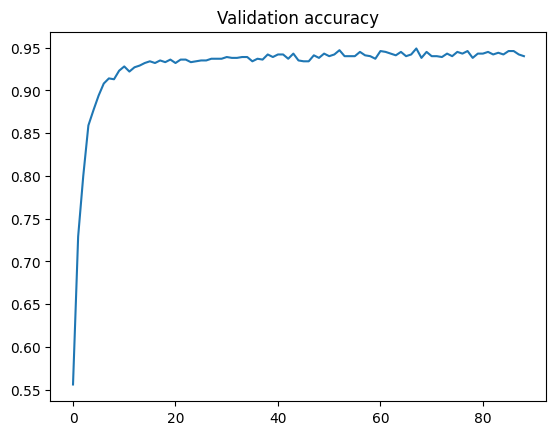

In [23]:
sns.lineplot(model.validation_scores_)
plt.title("Validation accuracy")

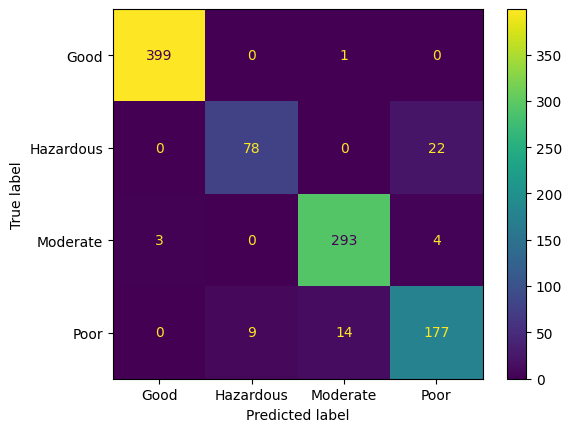

In [24]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(
    confusion_matrix(y_test, model.predict(X_test)),
    display_labels=encoder.inverse_transform(model.classes_)
).plot()

In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       400
           1       0.90      0.78      0.83       100
           2       0.95      0.98      0.96       300
           3       0.87      0.89      0.88       200

    accuracy                           0.95      1000
   macro avg       0.93      0.91      0.92      1000
weighted avg       0.95      0.95      0.95      1000



In [26]:
model_path = root_path.joinpath("saved-model", "model.pkl")
model_path.parent.mkdir(parents=True, exist_ok=True)

with open(model_path, "wb") as f:
    cp.dump(model, f)

In [27]:
import shutil

shutil.copyfile(
    "./air-quality-pollution.ipynb",
    root_path.joinpath("air-quality-pollution.ipynb")
)

PosixPath('saved-runs/run-1/air-quality-pollution.ipynb')